## ****Project: Clustering Solutions****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data file and prepare the data

In [2]:
data = pd.read_csv('../Data/wholesale_clients.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
## Remove Channel and Region fields
data = data.drop(columns=['Channel','Region'])

In [10]:
## Scale the features
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
model_df = sd.fit_transform(data)

model_df = pd.DataFrame(model_df,columns=data.columns)

In [14]:
model_df.std()

Fresh               1.001138
Milk                1.001138
Grocery             1.001138
Frozen              1.001138
Detergents_Paper    1.001138
Delicassen          1.001138
dtype: float64

### 2.KMeans Clustering

In [17]:
from sklearn.cluster import KMeans

Km = KMeans(n_clusters=2,verbose=1,random_state=42,n_init='auto')
Km.fit(model_df)

Initialization complete
Iteration 0, inertia 2452.385826378118.
Iteration 1, inertia 2275.02249942691.
Iteration 2, inertia 2271.267178530901.
Iteration 3, inertia 2268.4714398892716.
Iteration 4, inertia 2267.6364104624763.
Iteration 5, inertia 2267.3232589210443.
Iteration 6, inertia 2267.059822469993.
Iteration 7, inertia 2266.9552665832452.
Converged at iteration 7: strict convergence.


KMeans(n_clusters=2, random_state=42, verbose=1)

In [19]:
Km.cluster_centers_

array([[-0.29367713, -0.01956875,  0.02332865, -0.21388358,  0.06059209,
        -0.12529955],
       [ 1.63494882,  0.10894245, -0.12987444,  1.19072503, -0.33732612,
         0.69756319]])

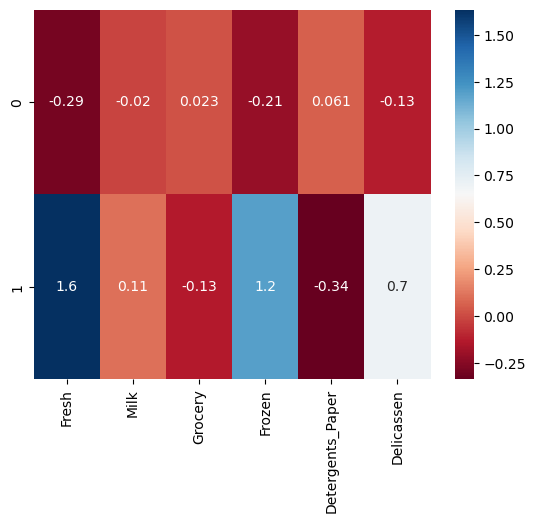

In [21]:
## Plot the cluster centers
sns.heatmap(
        pd.DataFrame(Km.cluster_centers_,columns=model_df.columns),
        cmap='RdBu',
        annot=True,
        fmt='.2g',
);

In [22]:
## Dervice the inertia and silhouette scores
Km.inertia_

2266.9552665832452

In [27]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score of KMeans: {silhouette_score(model_df,Km.labels_,metric='euclidean')} for 2 clusters')
print(f'Intertia for KMeans for 2 clusters {Km.inertia_}')


Silhouette Score of KMeans: 0.3998278091730005 for 2 clusters
Intertia for KMeans for 2 clusters 2266.9552665832452


In [69]:
## Tune the Km model

intertia_values = []
for k in range(2,16):
    Km = KMeans(n_clusters=k,verbose=0,random_state=42,n_init=10)
    Km.fit(model_df)
    intertia_values.append(Km.inertia_)

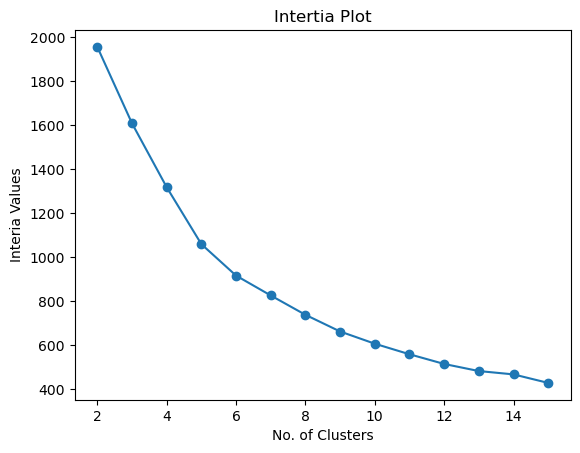

In [70]:
## Draw inertia Plot
plt.plot(range(2,16),intertia_values,'o-')
plt.xlabel('No. of Clusters')
plt.ylabel('Interia Values')
plt.title('Intertia Plot')
plt.show();

In [76]:
## Fit KMeans for 4 clusters
Km5 = KMeans(n_clusters=5,n_init='auto',random_state=42)
Km5.fit(model_df)

KMeans(n_clusters=5, random_state=42)

In [78]:
print(f'Silhouette Score of KMeans: {silhouette_score(model_df,Km5.labels_,metric='euclidean')} for 5 clusters')
print(f'Intertia for KMeans for 5 clusters {Km5.inertia_}')

Silhouette Score of KMeans: 0.36890127429678055 for 5 clusters
Intertia for KMeans for 5 clusters 1070.2551995135616


In [100]:
## Fit KMeans for 3 clusters
Km3 = KMeans(n_clusters=3,n_init='auto',random_state=42)
Km3.fit(model_df)

print(f'Silhouette Score of KMeans: {silhouette_score(model_df,Km3.labels_,metric='euclidean')} for 3 clusters')
print(f'Intertia for KMeans for 3 clusters {Km3.inertia_}')

Silhouette Score of KMeans: 0.4582633767207058 for 3 clusters
Intertia for KMeans for 3 clusters 1644.0598512347565


In [111]:
Counter(Km3.labels_)

Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})

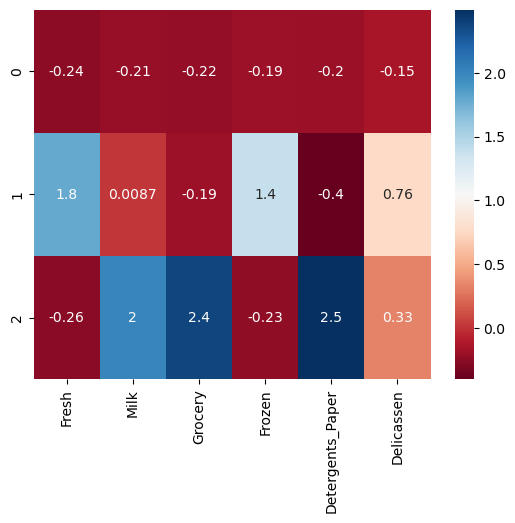

In [112]:
## Plot the cluster centers
sns.heatmap(
        pd.DataFrame(Km3.cluster_centers_,columns=model_df.columns),
        cmap='RdBu',
        annot=True,
        fmt='.2g',
);

### Hierarchical Clustering

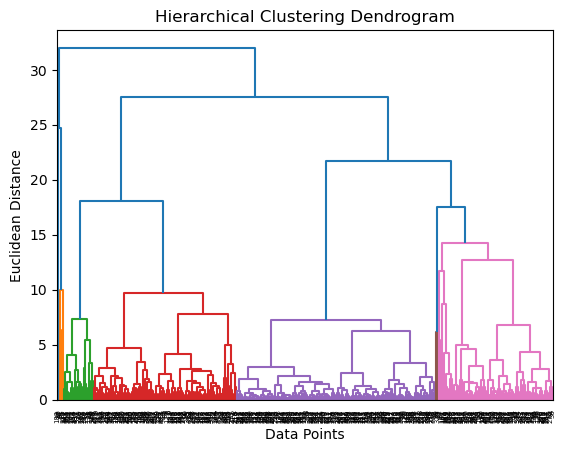

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(model_df,method='ward',metric='euclidean')
dendrogram_info = dendrogram(linkage_matrix,color_threshold=16)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show();

In [82]:
## Fit an agglomerate model with 4 clusters
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agg.fit(model_df)

AgglomerativeClustering(n_clusters=5)

In [83]:
from collections import Counter
Counter(agg.labels_)

Counter({np.int64(4): 177,
         np.int64(0): 153,
         np.int64(2): 104,
         np.int64(1): 5,
         np.int64(3): 1})

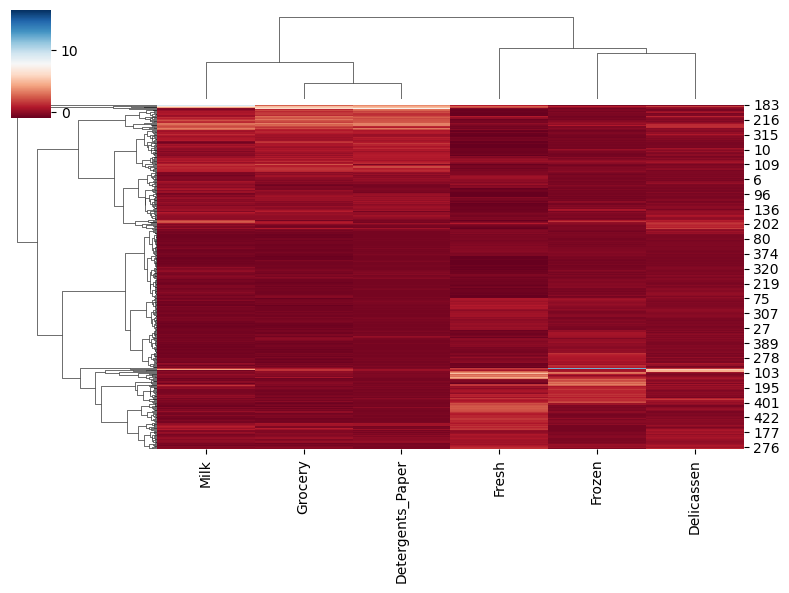

In [88]:
## Create a cluster map

clustermap = sns.clustermap(model_df,method='ward',
                            metric='euclidean',
                            cmap='RdBu',
                            xticklabels=model_df.columns,figsize=(8,6))
plt.show();

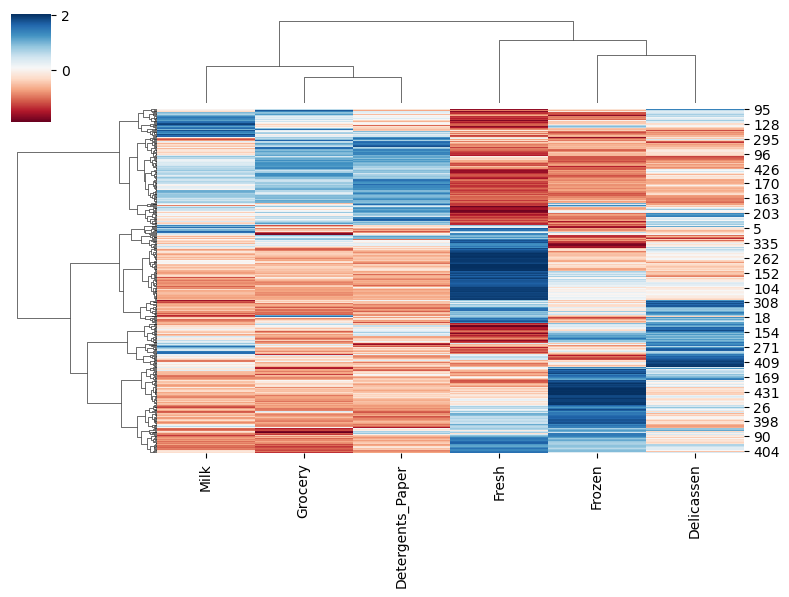

In [87]:
## Create a cluster map with z_score=0 (Scaling rows insetad of columns)

clustermap = sns.clustermap(model_df,method='ward',
                            metric='euclidean',
                            cmap='RdBu',
                            xticklabels=model_df.columns,
                            z_score=0,
                            figsize=(8,6)
                           )
plt.show();

### 4. DBSCAN Clustering

In [58]:
from sklearn.cluster import DBSCAN

In [94]:
## Function to tune the DBSCAN model by changing the epsilon and min_samples values
def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 10, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    dbscan_results = dbscan_results.sort_values('Silhouette Score',ascending=False)
    return dbscan_results

In [95]:
tuned_parm = tune_dbscan(model_df)
tuned_parm

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
272,3.5,2,2,8,0.740284
264,3.4,2,2,8,0.740284
256,3.3,2,2,8,0.740284
248,3.2,2,2,8,0.740284
224,2.9,2,2,10,0.582247
...,...,...,...,...,...
787,9.9,5,1,1,NaN
788,9.9,6,1,1,NaN
789,9.9,7,1,1,NaN
790,9.9,8,1,1,NaN


In [96]:
## Fit the DBSCAN model with tunes hyperparemeters
dbscan = DBSCAN(eps=tuned_parm['Eps'].iloc[0],
                min_samples=tuned_parm['Min Samples'].iloc[1]
               )
dbscan.fit(model_df)

DBSCAN(eps=np.float64(3.5000000000000004), min_samples=np.int64(2))

In [97]:
print(f'Silhouette Score of DBSCAN: {silhouette_score(model_df,dbscan.labels_,metric='euclidean')}')

Silhouette Score of DBSCAN: 0.740283564230615


In [98]:
Counter(dbscan.labels_)

Counter({np.int64(0): 430, np.int64(-1): 8, np.int64(1): 2})

### 5. Compare different models

In [99]:
def compare_models(model,data):
    print(model)
    print(f'Silhouette Score: {silhouette_score(data, model.labels_, metric='euclidean')}')
    print(Counter(model.labels_))

In [101]:
compare_models(Km3, model_df)

KMeans(n_clusters=3, random_state=42)
Silhouette Score: 0.4582633767207058
Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})


In [102]:
compare_models(agg, model_df)

AgglomerativeClustering(n_clusters=5)
Silhouette Score: 0.23988371669170097
Counter({np.int64(4): 177, np.int64(0): 153, np.int64(2): 104, np.int64(1): 5, np.int64(3): 1})


In [103]:
compare_models(dbscan, model_df)

DBSCAN(eps=np.float64(3.5000000000000004), min_samples=np.int64(2))
Silhouette Score: 0.740283564230615
Counter({np.int64(0): 430, np.int64(-1): 8, np.int64(1): 2})


## 6. Predict the cluster for a New Sample

In [106]:
new_sample = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])],columns=model_df.columns)

In [107]:
new_sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [108]:
## Scale the new sample data
new_sample_std = pd.DataFrame(sd.transform(new_sample), columns=model_df.columns)


In [109]:
new_sample_std

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.237451,1.248474,2.322787,-0.530388,2.544604,0.168671


In [110]:
## Predict the cluster of the new model using KMeans model with 3 clusters
Km3.predict(new_sample_std)

array([2], dtype=int32)

## Conclusion:
The new client belongs to cluster 2, i.e. invests more in Milk, Grocery and Detergent_Papers than anything else